<a href="https://colab.research.google.com/github/harshvardhan176/ML_LAB_01/blob/main/ML_LAB_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from numpy.linalg import norm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
#A1

file_path = "Lab Session Data.xlsx"
df = pd.read_excel(file_path, sheet_name="Purchase data")

print("Data Preview:\n", df.head())

df_cleaned = df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)', 'Payment (Rs)']].dropna()

A = df_cleaned[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']].values
C = df_cleaned['Payment (Rs)'].values


dimensionality = A.shape[1]
num_vectors = A.shape[0]

rank_A = np.linalg.matrix_rank(A)

A_pinv = np.linalg.pinv(A)
X = A_pinv.dot(C)

print("\n--- Analysis Results ---")
print(f"Dimensionality of vector space: {dimensionality}")
print(f"Number of vectors in the space: {num_vectors}")
print(f"Rank of matrix A: {rank_A}")
print(f"\nEstimated cost of each product:\n{X}")

Data Preview:
   Customer  Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment (Rs)  \
0      C_1           20             6                 2           386   
1      C_2           16             3                 6           289   
2      C_3           27             6                 2           393   
3      C_4           19             1                 2           110   
4      C_5           24             4                 2           280   

   Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  ...  \
0         NaN         NaN         NaN         NaN         NaN  ...   
1         NaN         NaN         NaN         NaN         NaN  ...   
2         NaN         NaN         NaN         NaN         NaN  ...   
3         NaN         NaN         NaN         NaN         NaN  ...   
4         NaN         NaN         NaN         NaN         NaN  ...   

   Unnamed: 12  Unnamed: 13  Unnamed: 14  Unnamed: 15  Unnamed: 16  \
0          NaN          NaN          NaN          NaN  

In [3]:
#A2
df = pd.read_excel("Lab Session Data.xlsx", sheet_name="Purchase data")

df['Class'] = df['Payment (Rs)'].apply(lambda x: 'RICH' if x > 200 else 'POOR')
df_cleaned = df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)', 'Class']].dropna()


X = df_cleaned[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']]
y = df_cleaned['Class']

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

clf = LogisticRegression()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred, target_names=le.classes_, zero_division=0))
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


--- Classification Report ---
              precision    recall  f1-score   support

        POOR       0.50      1.00      0.67         1
        RICH       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2


Accuracy: 0.5

Confusion Matrix:
 [[1 0]
 [1 0]]


Mean of price data (population mean): 1560.66
Variance of price data: 58732.37
Sample mean for Wednesdays: 1550.71
Difference from population mean: -9.96
Sample mean for April: 1698.95
Difference from population mean: 138.29
Probability of making a loss: 0.50
Probability of making a profit on Wednesday: 0.42
Conditional Probability (Profit | Wednesday): 0.42


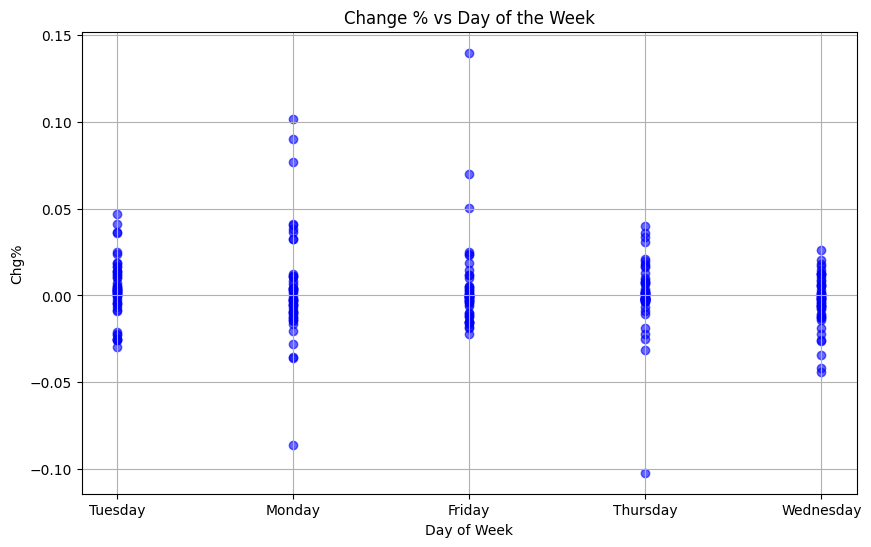

In [4]:
#A3
import statistics
import pandas as pd

df = pd.read_excel("Lab Session Data.xlsx", sheet_name="IRCTC Stock Price")

df['Date'] = pd.to_datetime(df['Date'])

df['Day'] = df['Date'].dt.day_name()

price_data = df.iloc[:, 3]
mean_price = statistics.mean(price_data)
variance_price = statistics.variance(price_data)

print(f"Mean of price data (population mean): {mean_price:.2f}")
print(f"Variance of price data: {variance_price:.2f}")

wednesday_prices = df[df['Day'] == 'Wednesday'].iloc[:, 3]
mean_wed = statistics.mean(wednesday_prices)
print(f"Sample mean for Wednesdays: {mean_wed:.2f}")
print(f"Difference from population mean: {mean_wed - mean_price:.2f}")

april_data = df[df['Date'].dt.month == 4].iloc[:, 3]
mean_april = statistics.mean(april_data)
print(f"Sample mean for April: {mean_april:.2f}")
print(f"Difference from population mean: {mean_april - mean_price:.2f}")

chg_col = df.iloc[:, 8]
num_loss_days = sum(chg_col.apply(lambda x: x < 0))
prob_loss = num_loss_days / len(chg_col)
print(f"Probability of making a loss: {prob_loss:.2f}")

wed_profit_days = df[(df['Day'] == 'Wednesday') & (chg_col > 0)].shape[0]
total_wed_days = df[df['Day'] == 'Wednesday'].shape[0]
prob_profit_wed = wed_profit_days / total_wed_days
print(f"Probability of making a profit on Wednesday: {prob_profit_wed:.2f}")

print(f"Conditional Probability (Profit | Wednesday): {prob_profit_wed:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(df['Day'], chg_col, color='blue', alpha=0.6)
plt.title("Change % vs Day of the Week")
plt.xlabel("Day of Week")
plt.ylabel("Chg%")
plt.grid(True)
plt.show()

In [5]:
#A4
import pandas as pd

excel = 'Lab Session Data.xlsx'
sheet = 'thyroid0387_UCI'

th_Data = pd.read_excel(excel, sheet_name=sheet)

th_Data.info()
print(th_Data.dtypes)
print(th_Data.isnull().sum())

numerical_cols = th_Data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = th_Data.select_dtypes(include=['object', 'bool']).columns.tolist()

numer_data = pd.to_numeric(th_Data[numerical_cols[1]], errors='coerce')

mean = th_Data[numerical_cols[1]].mean()
std = th_Data[numerical_cols[1]].std()

th_Data['z_score'] = (th_Data[numerical_cols[1]] - mean) / std

outliers = th_Data[abs(th_Data['z_score']) > 3]

print(f"{outliers}: Found {len(outliers)} outlier(s)")


mean = th_Data[numerical_cols[1]].mean()
std = th_Data[numerical_cols[1]].std()
print("Mean",mean,"Standard Deviation",std)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Record ID                  9172 non-null   int64 
 1   age                        9172 non-null   int64 
 2   sex                        9172 non-null   object
 3   on thyroxine               9172 non-null   object
 4   query on thyroxine         9172 non-null   object
 5   on antithyroid medication  9172 non-null   object
 6   sick                       9172 non-null   object
 7   pregnant                   9172 non-null   object
 8   thyroid surgery            9172 non-null   object
 9   I131 treatment             9172 non-null   object
 10  query hypothyroid          9172 non-null   object
 11  query hyperthyroid         9172 non-null   object
 12  lithium                    9172 non-null   object
 13  goitre                     9172 non-null   object
 14  tumor   

In [6]:
#A5
import pandas as pd
df = pd.read_excel("Lab Session Data.xlsx", sheet_name="IRCTC Stock Price")

obs1 = df.iloc[0]
obs2 = df.iloc[1]

binary_cols = [col for col in df.columns if set(df[col].dropna().unique()).issubset({0, 1})]
print("Binary columns:", binary_cols)

v1 = df.loc[0, binary_cols].values
v2 = df.loc[1, binary_cols].values

f11 = sum((v1 == 1) & (v2 == 1))
f00 = sum((v1 == 0) & (v2 == 0))
f10 = sum((v1 == 1) & (v2 == 0))
f01 = sum((v1 == 0) & (v2 == 1))

jc = f11 / (f11 + f10 + f01) if (f11 + f10 + f01) > 0 else 0
smc = (f11 + f00) / (f11 + f10 + f01 + f00) if (f11 + f10 + f01 + f00) > 0 else 0

print(f"f11 = {f11}, f10 = {f10}, f01 = {f01}, f00 = {f00}")
print(f"Jaccard Coefficient (JC): {jc:.2f}")
print(f"Simple Matching Coefficient (SMC): {smc:.2f}")

if jc > smc:
    print("JC emphasizes only matching 1's — better for sparse binary features like tags.")
else:
    print("SMC includes matching 0's — useful when 0 has meaning (e.g., absence matters).")

Binary columns: []
f11 = 0, f10 = 0, f01 = 0, f00 = 0
Jaccard Coefficient (JC): 0.00
Simple Matching Coefficient (SMC): 0.00
SMC includes matching 0's — useful when 0 has meaning (e.g., absence matters).


In [7]:
#A6
import pandas as pd
import numpy as np
from numpy.linalg import norm

df = pd.read_excel("Lab Session Data.xlsx", sheet_name="IRCTC Stock Price")

df_numeric = df.select_dtypes(include=[np.number]).dropna()

vec1 = df_numeric.iloc[0].values
vec2 = df_numeric.iloc[1].values

dot_product = np.dot(vec1, vec2)
norm_vec1 = norm(vec1)
norm_vec2 = norm(vec2)

cosine_similarity = dot_product / (norm_vec1 * norm_vec2)

print(f"Cosine Similarity between Observation 1 and 2: {cosine_similarity:.4f}")

Cosine Similarity between Observation 1 and 2: 1.0000


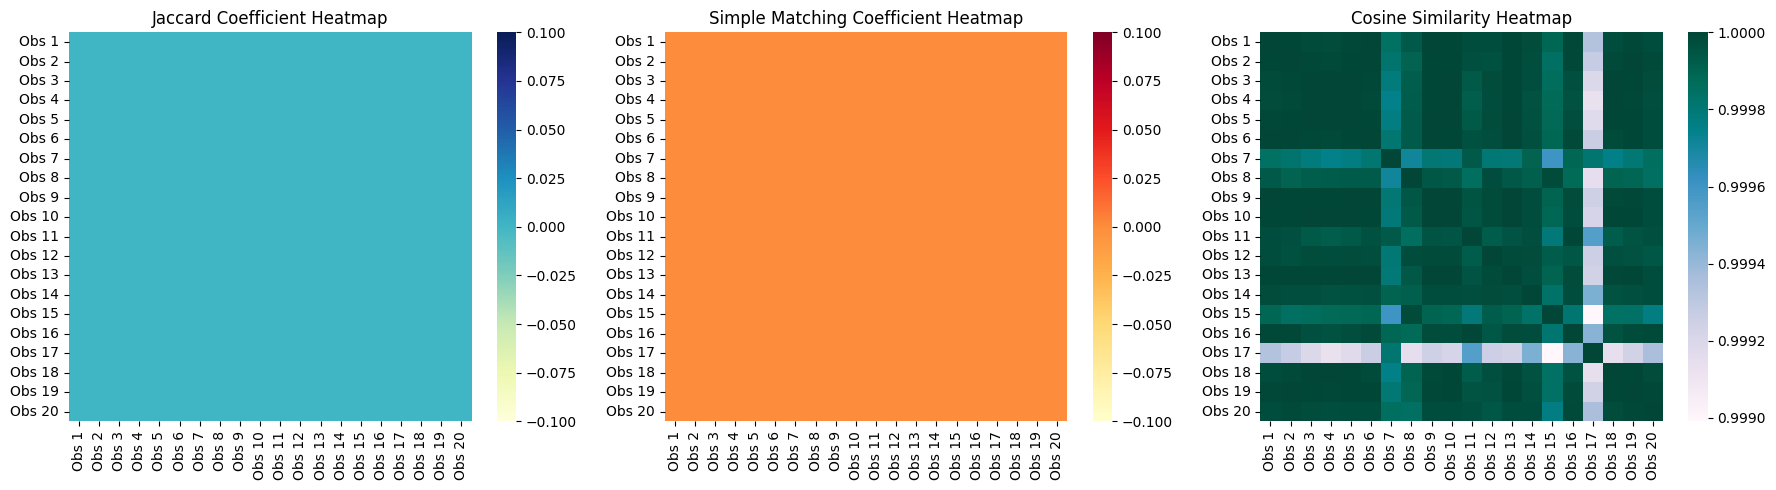

In [8]:
#A7
df = pd.read_excel("Lab Session Data.xlsx", sheet_name="IRCTC Stock Price")

df = df.head(20)

binary_cols = [col for col in df.columns if set(df[col].dropna().unique()).issubset({0, 1})]
df_binary = df[binary_cols].astype(int)

df_numeric = df.select_dtypes(include=[np.number]).dropna().head(20)

n = len(df)
jc_matrix = np.zeros((n, n))
smc_matrix = np.zeros((n, n))
cos_matrix = np.zeros((n, n))

def calculate_jc_smc(v1, v2):
    f11 = np.sum((v1 == 1) & (v2 == 1))
    f00 = np.sum((v1 == 0) & (v2 == 0))
    f10 = np.sum((v1 == 1) & (v2 == 0))
    f01 = np.sum((v1 == 0) & (v2 == 1))
    jc = f11 / (f11 + f10 + f01) if (f11 + f10 + f01) > 0 else 0
    smc = (f11 + f00) / (f11 + f10 + f01 + f00) if (f11 + f10 + f01 + f00) > 0 else 0
    return jc, smc

for i in range(n):
    for j in range(n):
        if len(binary_cols) > 0:
            jc, smc = calculate_jc_smc(df_binary.iloc[i].values, df_binary.iloc[j].values)
            jc_matrix[i, j] = jc
            smc_matrix[i, j] = smc
        vec1 = df_numeric.iloc[i].values
        vec2 = df_numeric.iloc[j].values
        cos_sim = np.dot(vec1, vec2) / (norm(vec1) * norm(vec2))
        cos_matrix[i, j] = cos_sim

jc_df = pd.DataFrame(jc_matrix, columns=[f"Obs {i}" for i in range(1, n+1)], index=[f"Obs {i}" for i in range(1, n+1)])
smc_df = pd.DataFrame(smc_matrix, columns=[f"Obs {i}" for i in range(1, n+1)], index=[f"Obs {i}" for i in range(1, n+1)])
cos_df = pd.DataFrame(cos_matrix, columns=[f"Obs {i}" for i in range(1, n+1)], index=[f"Obs {i}" for i in range(1, n+1)])

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.heatmap(jc_df, annot=False, cmap='YlGnBu')
plt.title("Jaccard Coefficient Heatmap")

plt.subplot(1, 3, 2)
sns.heatmap(smc_df, annot=False, cmap='YlOrRd')
plt.title("Simple Matching Coefficient Heatmap")

plt.subplot(1, 3, 3)
sns.heatmap(cos_df, annot=False, cmap='PuBuGn')
plt.title("Cosine Similarity Heatmap")

plt.tight_layout()
plt.show()

Columns with missing values: []


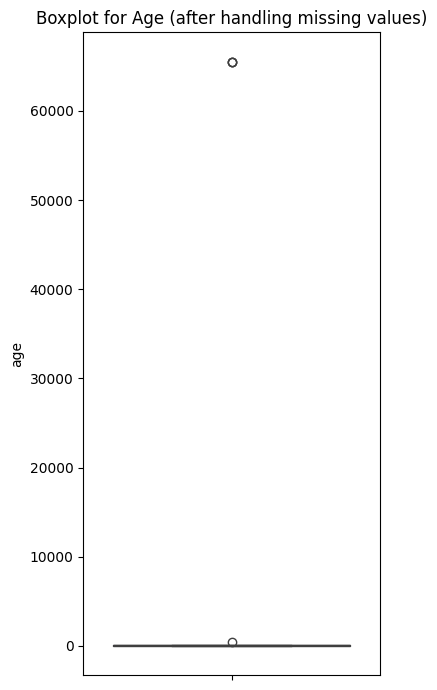


Null values remaining per column:
Record ID                    0
age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
TBG                          0
referral source              0
Condition                    0
dtyp

In [11]:
#A8
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the thyroid dataset which contains the 'age' column
excel = 'Lab Session Data.xlsx'
sheet = 'thyroid0387_UCI'
df = pd.read_excel(excel, sheet_name=sheet)


missing_cols = df.columns[df.isnull().any()]
print("Columns with missing values:", list(missing_cols))

for col in missing_cols:
    if df[col].dtype == 'object':
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)
        print(f"Filled missing values in '{col}' using MODE: {mode_val}")

    elif df[col].dtype in ['float64', 'int64']:

        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]

        if len(outliers) > 0:
            median_val = df[col].median()
            df[col].fillna(median_val, inplace=True)
            print(f"Filled missing values in '{col}' using MEDIAN: {median_val}")
        else:
            mean_val = df[col].mean()
            df[col].fillna(mean_val, inplace=True)
            print(f"Filled missing values in '{col}' using MEAN: {mean_val:.2f}")

# Plotting the boxplot for 'age' column after handling missing values
plt.figure(figsize=(4, 7))
sns.boxplot(y=df['age'])
plt.title("Boxplot for Age (after handling missing values)")
plt.ylabel("age")
plt.tight_layout()
plt.show()

print("\nNull values remaining per column:")
print(df.isnull().sum())

In [ ]:
# A9

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print("Numeric columns:", numeric_cols)

def min_max_normalize(series):
    return (series - series.min()) / (series.max() - series.min())

df_Scaled = df.copy()
for col in numeric_cols:
    df_Scaled[col] = min_max_normalize(df_Scaled[col])

def z_score_normalize(series):
    return (series - series.mean()) / series.std()

df_standardized = df.copy()
for col in numeric_cols:
    df_standardized[col] = z_score_normalize(df_standardized[col])

print("\nMin-Max Normalized Data (first 5 rows):")
print(df_Scaled[numeric_cols].head())

print("\nZ-Score Standardized Data (first 5 rows):")
print(df_standardized[numeric_cols].head())